<a href="https://colab.research.google.com/github/Iana-Neri22/AnalyticsStudies/blob/master/analise_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [736]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from math import nan

dict_colunas = {
    'UF': 'UF',
    'A002': 'Idade', 
    'A003': 'Gênero', 
    'A005': 'Escolaridade',
    'B0011': 'Febre', 
    'B0012': 'Tosse',
    'B0013': 'Dor de Garganta',
    'B0014': 'Dificuldade de Respirar',
    'B0015': 'Dor de Cabeça',
    'B0016': 'Dor no Peito',
    'B0017': 'Náusea',
    'B0018': 'Nariz Entupido',
    'B0019': 'Fadiga',
    'B00110': 'Dor nos Olhos',
    'B00111': 'Perda de Cheiro e Sabor', 
    'B00112': 'Dor Muscular', 
    'B0018': 'Nariz Entupido', 
    'B0019': 'Fadiga',
    'B002': 'Buscou_Estabelecimento_Saude',
    'B0031': 'Ficou_Casa', 
    'B0032': 'Ligar_Profissional_Saude', 
    'B0033': 'Remedio_Conta_Propria',
    'B0034': 'Remedio_Orientacao_Medica', 
    'B0035': 'Visita_Profissional_SUS', 
    'B0036': 'Visita_Profissional_Particular',
    'B0037': 'Outra_Medida_Recuperacao', 
    'B0042': 'Atendimento_PS_SUS_UPA', 
    'B0043': 'Atendimento_Hospital_SUS',
    'B0044': 'Atendimento_Ambulatorio_Consultorio_Privado_Forcas_Armadas', 
    'B0045': 'PS_Privado_Forcas_Armadas', 
    'B0046': 'Hospital_Privado_Forcas_Armadas',
    'B005': 'Internacao', 
    'B006': 'Internacao_Respiracao_Artifical', 
    'B007': 'Possui_Plano_Saude',
    'C001': 'Trabalhou', 
    'C002': 'Afastado', 
    'C003': 'Motivo_Afastamento',
    'C004': 'Continuou_Remunerado',
    'C005': 'Tempo_Afastamento', 
    'C006': 'Tem_Mais_Um_Trabalho',
    'C007': 'Tipo_Emprego', 
    'C007A': 'Area_Trabalho', 
    'C007B': 'Tipo_Vinculo_Empregaticio',
    'C007C': 'Cargo_Trabalho', 
    'C007D': 'Atividade_Trabalho', 
    'C007E': 'Numero_Funcionarios_Empresa',
    'C008': 'Horas_Trabalho_Semana', 
    'C011A11': 'Faixa_Rendimento', 
    'C013': 'Home_Office',
    'V1013': 'Mes_Pesquisa'
}

dict_uf = {
    11: 'RO',
    12:	'AC',
    13: 'AM',
    14: 'RR',
    15:	'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22:	'PI',
    23: 'CE',
    24:	'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28:	'SE',
    29:	'BA',
    31:	'MG',
    32:	'ES',
    33:	'RJ',
    35:	'SP',
    41:	'PR',
    42:	'SC',
    43:	'RS',
    50:	'MS',
    51:	'MT',
    52:	'GO',
    53:	'DF'
}

dict_mes = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Listar colunas de sintomas
cols_sintomas = [ 
    'Dor de Garganta',
    'Dificuldade de Respirar',
    'Dor de Cabeça',
    'Dor no Peito',
    'Náusea',
    'Nariz Entupido',
    'Fadiga',
    'Dor nos Olhos',
    'Perda de Cheiro e Sabor', 
    'Dor Muscular', 
    'Nariz Entupido', 
    'Fadiga']

lista_colunas = list(dict_colunas.keys())

# Path de todos os arquivos csv para análise
caminho_arquivos = './Datasets'
# Armazenando o path de cada arquivo

dados_por_mes = glob.glob(os.path.join(caminho_arquivos, "PNAD_COVID*"))

meu_arquivo = Path(f'{caminho_arquivos}/DadosCovidCompilados.csv')
if not meu_arquivo.is_file():
    # Unindo todos os arquivos em um único dataframe
    df = pd.concat((pd.read_csv(f) for f in dados_por_mes), ignore_index=True)
    df.to_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv') 
    df = pd.read_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv', usecols=lista_colunas)
else:
    df = pd.read_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv', usecols=lista_colunas)
#else:
#    df = pd.concat((pd.read_csv(f) for f in dados_por_mes), ignore_index=True)
#    df.to_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv') 
#    df = pd.read_csv(f'{caminho_arquivos}/DadosCovidCompilados.csv', usecols=lista_colunas)



In [737]:
# Renomeando as colunas do Dataframe para maior legibilidade
df = df.rename(columns=dict_colunas)

# Substituindo o código de UF pela sigla dos estados
df = df.replace({"UF": dict_uf})

# Exibir as 5 primeiras linhas do Dataframe
df.head()

,UF,Mes_Pesquisa,Idade,Gênero,Escolaridade,Febre,Tosse,Dor de Garganta,Dificuldade de Respirar,Dor de Cabeça,...,Tem_Mais_Um_Trabalho,Tipo_Emprego,Area_Trabalho,Tipo_Vinculo_Empregaticio,Cargo_Trabalho,Atividade_Trabalho,Numero_Funcionarios_Empresa,Horas_Trabalho_Semana,Faixa_Rendimento,Home_Office
0,RO,6,35,1,5,2,2,2,2,2,...,2.0,4.0,NaN,1.0,35.0,6.0,NaN,48.0,4.0,NaN
1,RO,6,29,2,7,2,2,2,2,2,...,2.0,7.0,NaN,NaN,34.0,22.0,NaN,40.0,0.0,NaN
2,RO,6,13,1,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RO,6,10,1,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RO,6,57,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [738]:
# Exibir o número total de linhas e colunas do dataframe
print(f'Nº de Linhas: {df.shape[0]}')
print(f'Nº de Colunas: {df.shape[1]}')

#Tipo das variáveis
#df.dtypes.sort_values(ascending=False)

Nº de Linhas: 1151956
Nº de Colunas: 48


In [739]:
#Verificando valores ausentes do df (isnull().sum())
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Internacao_Respiracao_Artifical                               0.999353
Internacao                                                    0.993885
Numero_Funcionarios_Empresa                                   0.988187
PS_Privado_Forcas_Armadas                                     0.985427
Atendimento_Ambulatorio_Consultorio_Privado_Forcas_Armadas    0.985427
Atendimento_PS_SUS_UPA                                        0.985427
Hospital_Privado_Forcas_Armadas                               0.985427
Atendimento_Hospital_SUS                                      0.985427
Tempo_Afastamento                                             0.968080
Home_Office                                                   0.954240
Continuou_Remunerado                                          0.953506
Ficou_Casa                                                    0.948396
Visita_Profissional_Particular                                0.948396
Visita_Profissional_SUS                                       0.948396
Remedi

In [740]:
# Valores correspondentes ao mês de início e fim da pesquisa
print('Início: ', df.Mes_Pesquisa.min())
print('Fim: ', df.Mes_Pesquisa.max())

Início:  6
Fim:  8


In [741]:
#Resumo do dataset com as colunas e o tipo de dados presente em cada uma delas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151956 entries, 0 to 1151955
Data columns (total 48 columns):
 #   Column                                                      Non-Null Count    Dtype  
---  ------                                                      --------------    -----  
 0   UF                                                          1151956 non-null  object 
 1   Mes_Pesquisa                                                1151956 non-null  int64  
 2   Idade                                                       1151956 non-null  int64  
 3   Gênero                                                      1151956 non-null  int64  
 4   Escolaridade                                                1151956 non-null  int64  
 5   Febre                                                       1151956 non-null  int64  
 6   Tosse                                                       1151956 non-null  int64  
 7   Dor de Garganta                                             115

In [742]:
# Mostrar os estados presentes na pesquisa
print(f'Os estados presente na pesquisa são: {df["UF"].unique()}')

Os estados presente na pesquisa são: ['RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']


In [743]:
# Tratamento para exibir o número de Entrevistados em cada mês e o total de pessoas entrevistadas na pesquisa
# Primeiro estou agrupando o dataframe pelo mês da pesquisa e somando o valor de pessoas entrevista a cada mês
# Também renomeio as colunas para tornar o Dataframe mais legível

tot_entrevistados = df.groupby(['Mes_Pesquisa'])['UF'].count()
tot_entrevistados = pd.DataFrame({'Mês': tot_entrevistados.index, 'Entrevistados':tot_entrevistados.values})
tot_entrevistados = tot_entrevistados.replace({"Mês": dict_mes})
total = tot_entrevistados['Entrevistados'].sum()
tot_entrevistados.loc[-1] = ['Total', total]
tot_entrevistados.index = tot_entrevistados.index + 1

display(tot_entrevistados)

,Mês,Entrevistados
1,Junho,381270
2,Julho,384166
3,Agosto,386520
0,Total,1151956


In [744]:
# Total de UF presentes na pesquisa 

print(f'Ao total {len(df["UF"].unique())} UFs participaram da pesquisa.')

Ao total 27 UFs participaram da pesquisa.


In [745]:
# Quais estados tiveram o maior número de entrevistados?

# Agrupo os dados por UF e conto o total de participantes em cada estado
# Ordeno os dados primeiro pelo número total de entrevistados e depois pela UF 

df_entrev_uf = df.groupby(['UF'])['UF'].count()
df_entrev_uf = pd.DataFrame({'UF': df_entrev_uf.index, 'Total de Entrevistados':df_entrev_uf.values})
df_entrev_uf = df_entrev_uf.sort_values(by=['Total de Entrevistados', 'UF'], ascending=[False, True])
df_entrev_uf['País'] = 'BRA'
display(df_entrev_uf)

df_entrev_uf.to_csv(f'{caminho_arquivos}/entrevistados_uf.csv')

,UF,Total de Entrevistados,País
25,SP,104556,BRA
10,MG,104170,BRA
18,RJ,86548,BRA
23,SC,70365,BRA
22,RS,66915,BRA
17,PR,60489,BRA
9,MA,57480,BRA
4,BA,52375,BRA
5,CE,51687,BRA
15,PE,48570,BRA


<Axes: xlabel='UF'>

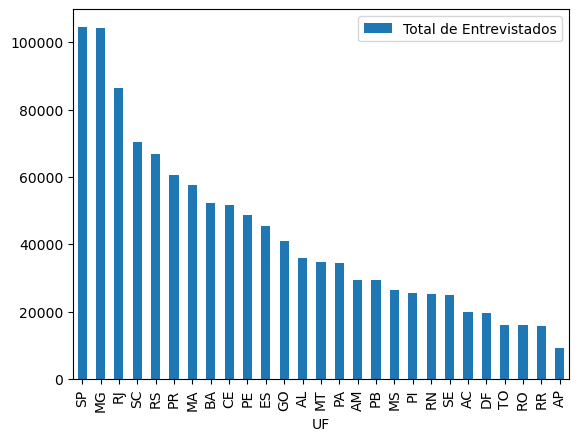

In [746]:
# Gráfico para exibir o número total de entrevistados por UF
df_entrev_uf.plot(x="UF", y="Total de Entrevistados", kind='bar')

In [747]:
df_ = df[df['Trabalhou'].isin([1, 2])]
#cols_sintomas = [i for i in list(dict_colunas.values()) if i.startswith('Sintoma')]
df['Total_Sintomas'] = (df[cols_sintomas] == 1).sum(axis=1)
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Contar o número de indivíduos por faixa etária e sexo
df_piramide = df.groupby(['Faixa_Etaria', 'Gênero']).size().unstack(fill_value=0)

# Para gráfico de pirâmide populacional, você pode querer ajustar os valores para que os homens e mulheres apareçam em lados opostos
df_piramide = df_piramide.reset_index()

#df_2 = df_piramide.melt(id_vars='Total_Sintomas', var_name='Gênero', value_name='Total de sintomas por gênero')
#display(df_2)
#
df_piramide = df_piramide.melt(id_vars='Faixa_Etaria', var_name='Gênero', value_name='Total por Gênero e Faixa Etária')
df_piramide['Gênero'] = df_piramide['Gênero'].map({1: 'Masculino', 2: 'Feminino'})

# Exportar o DataFrame para um arquivo CSV se necessário
df_piramide.to_csv(f'{caminho_arquivos}/piramide_populacional.csv', index=False)
display(df_piramide)
#df_pie = 

,Faixa_Etaria,Gênero,Total por Gênero e Faixa Etária
0,0-18,Masculino,139909
1,19-30,Masculino,96754
2,31-40,Masculino,81322
3,41-50,Masculino,76900
4,51-60,Masculino,69382
5,61-70,Masculino,50536
6,71-80,Masculino,26940
7,81-90,Masculino,9647
8,91-100,Masculino,1600
9,0-18,Feminino,133955


0          Masculino
1           Feminino
2          Masculino
3          Masculino
4           Feminino
             ...    
1151951     Feminino
1151952     Feminino
1151953    Masculino
1151954    Masculino
1151955     Feminino
Name: Gênero, Length: 1151956, dtype: object

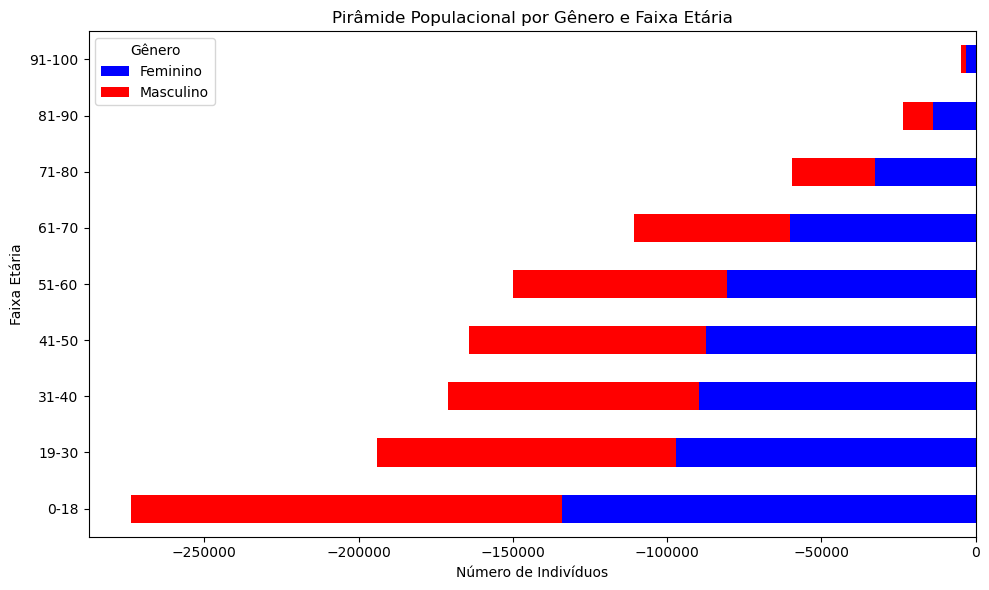

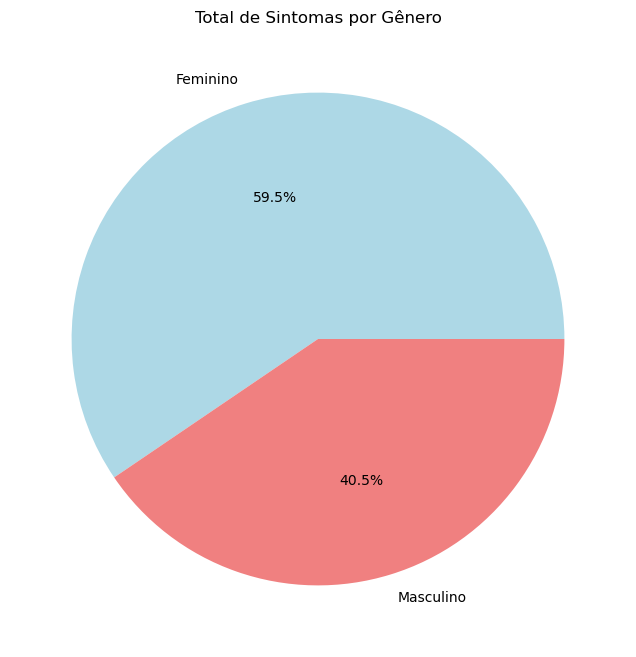

In [748]:
dict_genero = {
    1.: 'Masculino',
    2.: 'Feminino'
}

# Calcular total de sintomas
df['Total_Sintomas'] = (df[cols_sintomas] == 1).sum(axis=1)

# Criar faixa etária
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Substituir valores de gênero com dict_genero
df['Gênero'] = df['Gênero'].map(dict_genero)
display(df['Gênero'])

# Contar o número de indivíduos por faixa etária e sexo
df_piramide = df.groupby(['Faixa_Etaria', 'Gênero']).size().unstack(fill_value=0)
df_piramide = df_piramide.apply(lambda x: x if x.name == 'Masculino' else -x, axis=1).reset_index()

# Agrupar total de sintomas por gênero
df_pie = df.groupby('Gênero')['Total_Sintomas'].sum().reset_index()
df_pie['Porcentagem'] = df_pie['Total_Sintomas'] / df_pie['Total_Sintomas'].sum() * 100

# Gráfico de pirâmide populacional
plt.figure(figsize=(10, 6))
df_piramide.plot(kind='barh', x='Faixa_Etaria', stacked=True, color=['blue', 'red'], ax=plt.gca())
plt.title('Pirâmide Populacional por Gênero e Faixa Etária')
plt.xlabel('Número de Indivíduos')
plt.ylabel('Faixa Etária')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_pie['Porcentagem'], labels=df_pie['Gênero'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Total de Sintomas por Gênero')
plt.show()

['Masculino' 'Feminino']


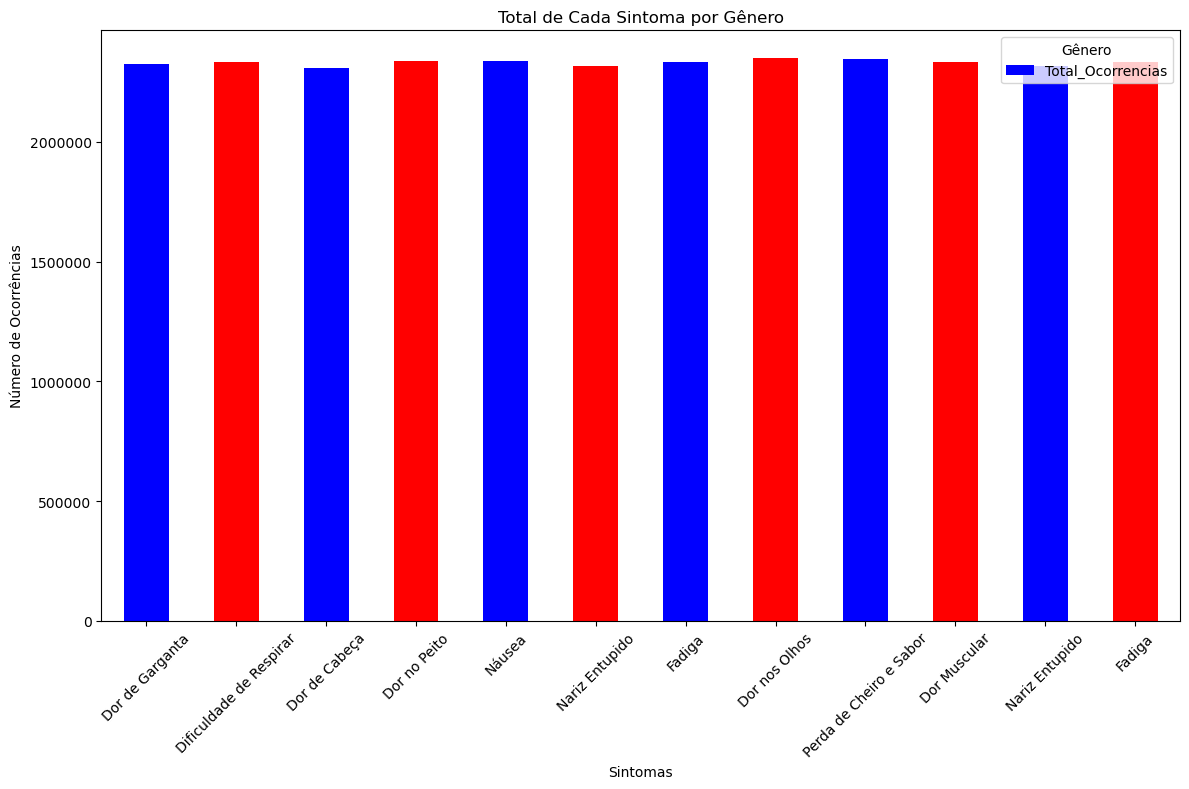

In [749]:
from matplotlib.ticker import ScalarFormatter

# Sum each symptom column where the value equals 1
sum_sintomas = df[cols_sintomas].sum(axis=0)

# Convert the result to a DataFrame for better readability (optional)
sum_sintomas_df = pd.DataFrame(sum_sintomas, columns=['Total_Ocorrencias'])

# Reset index to turn symptoms into a proper column (optional for better readability)
sum_sintomas_df.reset_index(inplace=True)
sum_sintomas_df.columns = ['Sintoma', 'Total_Ocorrencias']

# Substituir valores de gênero com 
#df['Gênero'] = df['Gênero'].map(dict_genero)
print(df['Gênero'].unique())
# Verificar se há valores nulos após o mapeamento e remover
#df = df.dropna(subset=['Gênero'])

# Agrupar total de cada sintoma por gênero
df_sintomas_genero = df.groupby('Gênero')[cols_sintomas].sum()
#display(df_sintomas_genero)
# Exibir dataframe para verificar
#display(df_sintomas_genero)

# Transpor os dados para preparar para o gráfico de barras agrupadas
df_sintomas_genero = df_sintomas_genero.T

# Gráfico de barras agrupadas para sintomas por gênero
plt.figure(figsize=(12, 8))
sum_sintomas_df.plot(kind='bar', x='Sintoma', y='Total_Ocorrencias', color=['blue', 'red'], ax=plt.gca())
plt.title('Total de Cada Sintoma por Gênero')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Sintomas')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()


['Masculino' 'Feminino']


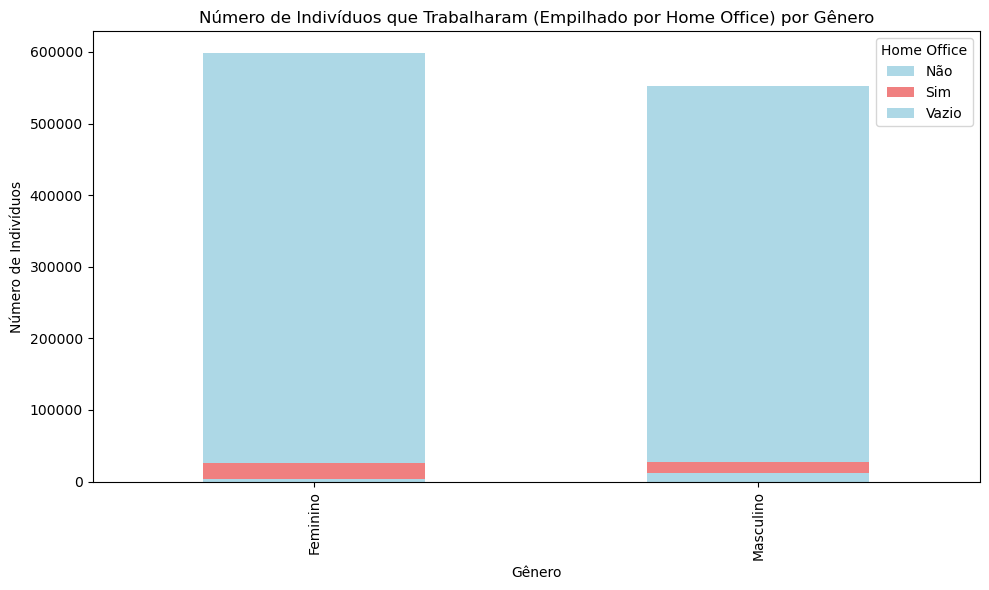

In [750]:
# Mapeando valores na coluna 'Trabalhou'

df['Trabalhou'] = df['Trabalhou'].map({1.: 'Sim', 2.: 'Não', np.nan: 'Vazio'})
df['Home_Office'] = df['Home_Office'].map({1.: 'Sim', 2.: 'Não', np.nan: 'Vazio'})

# Mapeando valores na coluna 'Home_Office'
#df['Home_Office'] = df['Home_Office'].map({1: 'Sim', 2: 'Não', np.nan: 'Não Informado'})

#display(df_trabalhou)
# Filtrar apenas os indivíduos que trabalharam
df_trabalhou = df.copy()

#df_trabalhou = df_trabalhou[df_trabalhou['Home_Office'].isin(['Sim', 'Não'])]

# Filtrar onde a coluna 'Home_Office' tem os valores 'Sim' ou 'Não'

df_trabalhou_home_office = df_trabalhou[df_trabalhou['Home_Office'] == 'Sim']
#display(df_trabalhou_home_office)

# Contar os casos de trabalho em home office e não home office, por gênero
print(df_trabalhou['Gênero'].unique())
df_trabalhou_home_office = df_trabalhou.groupby(['Gênero', 'Home_Office']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
df_trabalhou_home_office.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title('Número de Indivíduos que Trabalharam (Empilhado por Home Office) por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Indivíduos')
plt.legend(title='Home Office')
plt.tight_layout()
plt.show()

Home_Office,Gênero,Não,Sim
0,Feminino,898,5543
1,Masculino,2063,3136


<Figure size 1000x600 with 0 Axes>

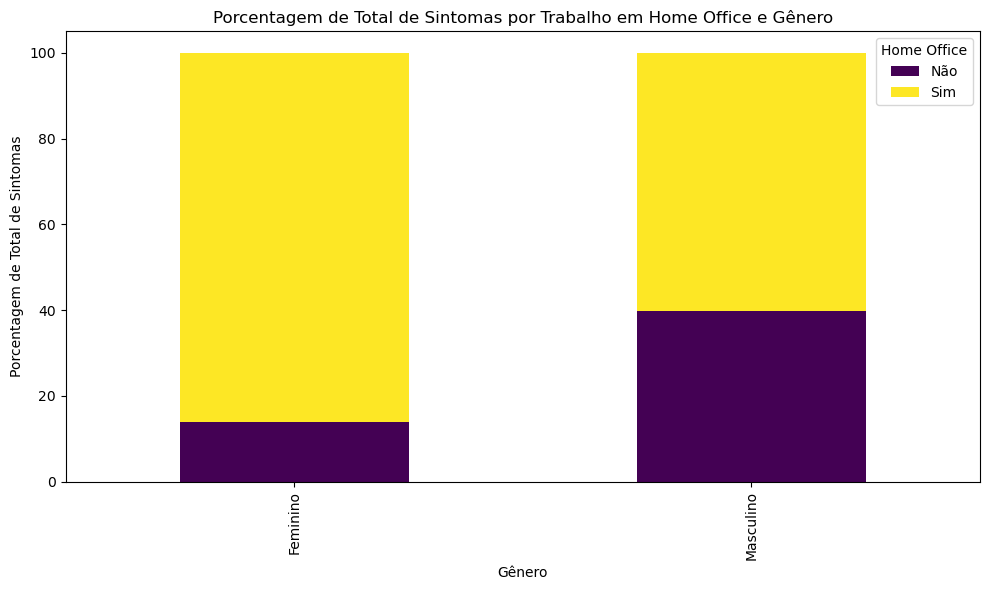

In [751]:
# Agregar o número total de sintomas por gênero e status de home office
df_trabalhou = df_trabalhou[df_trabalhou['Home_Office'].isin(['Sim', 'Não'])]
df_sintomas = df_trabalhou.groupby(['Gênero', 'Home_Office'])['Total_Sintomas'].sum().unstack(fill_value=0).reset_index()
display(df_sintomas)
# Calcular a porcentagem de sintomas por gênero e status de home office

df_sintomas.set_index('Gênero', inplace=True)
df_sintomas_percentage = df_sintomas.div(df_sintomas.sum(axis=1), axis=0) * 100


# Criar o gráfico de colunas empilhadas
plt.figure(figsize=(10, 6))
ax = df_sintomas_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Porcentagem de Total de Sintomas por Trabalho em Home Office e Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem de Total de Sintomas')
plt.legend(title='Home Office')
plt.tight_layout()
plt.show()

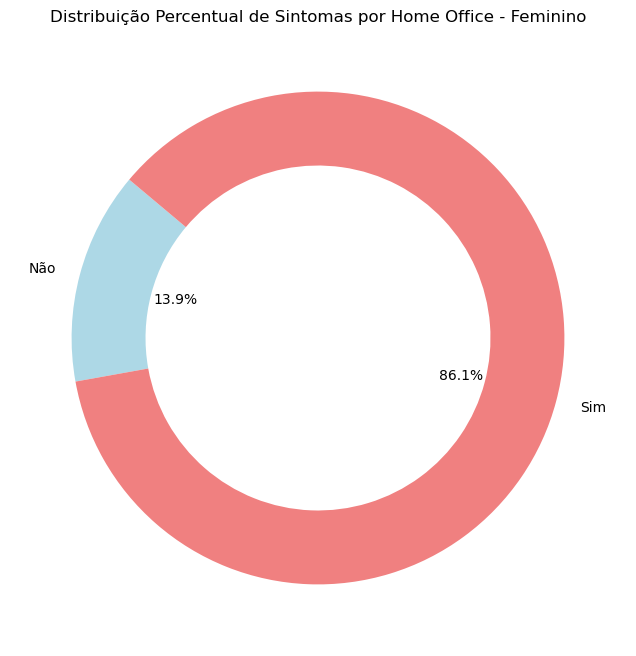

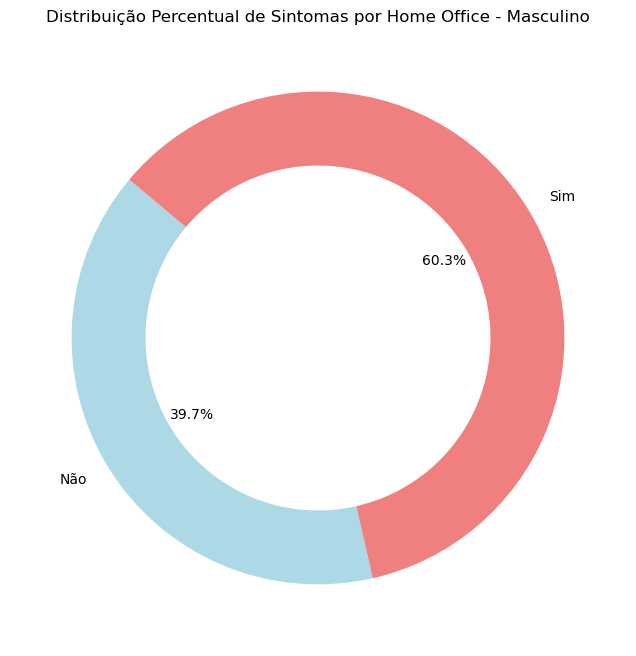

In [752]:
df_sintomas = df_trabalhou.groupby(['Gênero', 'Home_Office'])['Total_Sintomas'].sum().unstack(fill_value=0).reset_index()

# Criar gráfico de rosca para cada gênero
for genero in df_sintomas['Gênero']:
    subset = df_sintomas[df_sintomas['Gênero'] == genero]
    total_sintomas = subset.drop(columns='Gênero').sum(axis=1).values[0]
    sintomas_percentuais = (subset.drop(columns='Gênero').div(total_sintomas, axis=0).values[0] * 100)

    plt.figure(figsize=(8, 8))
    plt.pie(sintomas_percentuais, labels=subset.columns[1:], autopct='%1.1f%%', startangle=140, 
            wedgeprops=dict(width=0.3), colors=['lightblue', 'lightcoral'])
    plt.title(f'Distribuição Percentual de Sintomas por Home Office - {genero}')
    plt.show()

In [753]:
del df